In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD JPY/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

<Figure size 1440x360 with 0 Axes>

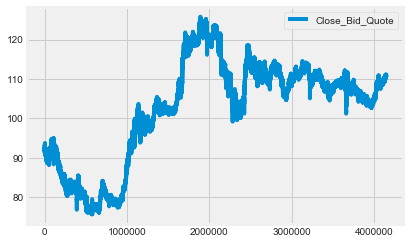

In [3]:
plt.figure(figsize=(20,5))
data.plot()

In [4]:
data.head

<bound method NDFrame.head of                    Timestamp  Close_Bid_Quote
0        2010-01-03 17:01:00           92.960
1        2010-01-03 17:02:00           92.990
2        2010-01-03 17:03:00           92.990
3        2010-01-03 17:04:00           92.990
4        2010-01-03 17:05:00           93.010
...                      ...              ...
4146980  2021-06-30 23:54:00          111.091
4146981  2021-06-30 23:55:00          111.092
4146982  2021-06-30 23:56:00          111.091
4146983  2021-06-30 23:57:00          111.082
4146984  2021-06-30 23:58:00          111.085

[4146985 rows x 2 columns]>

In [5]:
data['Timestamp'].min()

'2010-01-03 17:01:00'

In [6]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [7]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [8]:
data = data.resample("D").max()

In [9]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

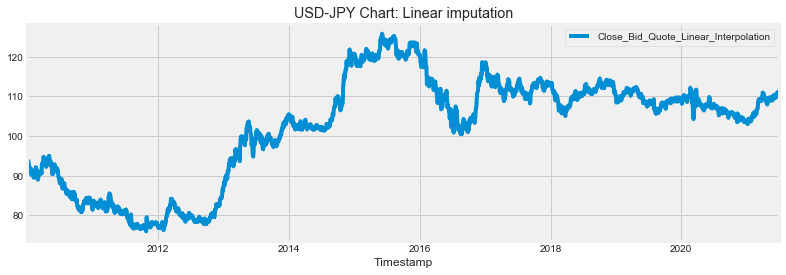

In [10]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('USD-JPY Chart: Linear imputation')
plt.show(block=False)

In [11]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [12]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

In [13]:
data.head()

,Close_Bid_Quote
Timestamp,
2010-01-03,93.08
2010-01-04,93.20
2010-01-05,92.15
2010-01-06,92.71
2010-01-07,93.75


In [14]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24

In [15]:
len(test)

840

In [16]:
len(train)

3357

In [17]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

3358

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.34379072],
       [0.34619625],
       [0.32514784],
       ...,
       [0.70245565],
       [0.69798537],
       [0.70620427]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets

In [20]:
# Create the training data set 
# Create the scaled training data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.34379072, 0.34619625, 0.32514784, 0.33637366, 0.35722161,
       0.35120778, 0.34278841, 0.33436905, 0.33497043, 0.32795429,
       0.31793124, 0.32254185, 0.30610404, 0.30409943, 0.30209482,
       0.30329758, 0.30911096, 0.31472386, 0.31953493, 0.29307407,
       0.29026762, 0.28746116, 0.29287361, 0.288263  , 0.28966623,
       0.29227223, 0.29988975, 0.29477799, 0.28966623, 0.30049113,
       0.29888744, 0.30730681, 0.30349805, 0.2790418 , 0.27513281,
       0.27122381, 0.27322843, 0.28224917, 0.28445424, 0.2826501 ,
       0.28986669, 0.28816277, 0.28645886, 0.28605793, 0.29167084,
       0.30971234, 0.32374461, 0.32474692, 0.32224115, 0.31973539,
       0.31612709, 0.30450035, 0.28906485, 0.2764358 , 0.27002105,
       0.26791621, 0.26581137, 0.27122381, 0.26941967, 0.26120076])]
[0.26901874310915086]

[array([0.34379072, 0.34619625, 0.32514784, 0.33637366, 0.35722161,
       0.35120778, 0.34278841, 0.33436905, 0.33497043, 0.32795429,
       0.31793124, 0.32254185, 0.30

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
104/104 [==============================] - 15s 84ms/step - loss: 0.0275
Epoch 2/10
104/104 [==============================] - 9s 83ms/step - loss: 4.5084e-04
Epoch 3/10
104/104 [==============================] - 9s 87ms/step - loss: 4.1540e-04
Epoch 4/10
104/104 [==============================] - 9s 86ms/step - loss: 4.0944e-04
Epoch 5/10
104/104 [==============================] - 9s 84ms/step - loss: 3.8968e-04
Epoch 6/10
104/104 [==============================] - 9s 85ms/step - loss: 4.0688e-04
Epoch 7/10
104/104 [==============================] - 9s 84ms/step - loss: 3.6160e-04
Epoch 8/10
104/104 [==============================] - 9s 87ms/step - loss: 3.6092e-04
Epoch 9/10
104/104 [==============================] - 9s 85ms/step - loss: 3.2973e-04
Epoch 10/10
104/104 [==============================] - 9s 88ms/step - loss: 3.1735e-04


In [22]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.6636020669627393

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


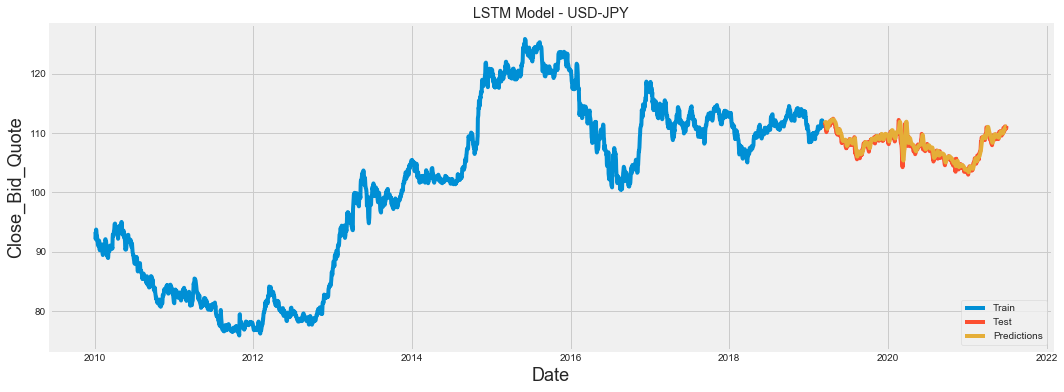

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model - USD-JPY')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Bid_Quote', fontsize=18)
plt.plot(train['Close_Bid_Quote'])
plt.plot(valid[['Close_Bid_Quote', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [24]:
# Show the valid and predicted prices
valid

,Close_Bid_Quote,Predictions
Timestamp,,
2019-03-15,111.757,111.631554
2019-03-16,111.690,111.691856
2019-03-17,111.623,111.750931
2019-03-18,111.580,111.794479
2019-03-19,111.682,111.818413
...,...,...
2021-06-26,110.854,111.008408
2021-06-27,110.833,111.058479
2021-06-28,110.972,111.083382
